In [15]:
from ultralytics import YOLO
import cv2
import os
import sys
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [16]:
labels = pd.read_csv('./labels_my-project-name_2024-05-12-05-03-51.csv')
labels.head()

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,Bad,155,93,50,57,Jasmine (1).jpg,250,250
1,Bad,156,106,49,64,Jasmine (10).jpg,250,250
2,Moderate,130,124,60,63,Jasmine (100).jpg,250,250
3,Moderate,112,49,61,59,Jasmine (101).jpg,250,250
4,Moderate,74,151,51,56,Jasmine (102).jpg,250,250


## EDIT "path" to match your jasmine rice source

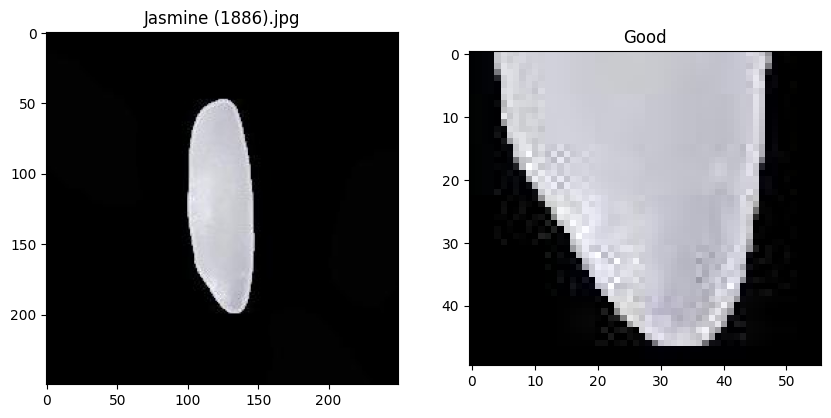

In [17]:
N = labels.shape[0]
rr = np.random.randint(0, N)

# EDIT HERE 
path = '../rice-image-dataset-for-object-segmentation/Rice_Image_Dataset_Seg/Jasmine/' + labels.iloc[rr]['image_name']

img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.title(labels.iloc[rr]['image_name'])
plt.imshow(img)

x, y, w, h = labels.iloc[rr][['bbox_x', 'bbox_y', 'bbox_width', 'bbox_height']]
qc = labels.iloc[rr]['label_name']
crop_img = img[y:y+h, x:x+w]
plt.subplot(1, 2, 2)
plt.title(qc)
plt.imshow(crop_img)
plt.show()

In [18]:
print("Good: ", labels[labels['label_name'] == 'Good'].shape[0])
print("Moderate: ", labels[labels['label_name'] == 'Moderate'].shape[0])
print("Bad: ", labels[labels['label_name'] == 'Bad'].shape[0])

print("width min max mean:", labels['bbox_width'].min(), labels['bbox_width'].max(), labels['bbox_width'].mean())
print("height min max mean:", labels['bbox_height'].min(), labels['bbox_height'].max(), labels['bbox_height'].mean())

Good:  150
Moderate:  150
Bad:  150
width min max mean: 32 69 49.30222222222222
height min max mean: 32 67 49.888888888888886


In [24]:
for i in range(N):
    img = cv2.imread('../rice-image-dataset-for-object-segmentation/Rice_Image_Dataset_Seg/Jasmine/' + labels.iloc[i]['image_name'])
    x, y, w, h = labels.iloc[i][['bbox_x', 'bbox_y', 'bbox_width', 'bbox_height']]
    qc = labels.iloc[i]['label_name']
    crop_img = img[y:y+h, x:x+w]
    name = labels.iloc[i]['image_name']
    # mkdir if not exist
    if not os.path.exists(f'./dataset/train/{qc}'):
        os.makedirs(f'./dataset/train/{qc}')
    if not os.path.exists(f'./dataset/val/{qc}'):
        os.makedirs(f'./dataset/val/{qc}')
    path = f'./dataset/train/{qc}/{name}'
    path2 = f'./dataset/val/{qc}/{name}'
    cv2.imwrite(path, crop_img)
    cv2.imwrite(path2, crop_img)
    

In [ ]:
model = YOLO('yolov8x-cls.pt')

# run4-x500-b80-im100

config = {
    'data': os.path.abspath('./dataset'),
    'epochs': 500,
    'batch': 80,
    'imgsz': 100,
    'device': '0',
    'workers': 32,
    'cache': True,
}
trained_model = model.train(**config)

In [14]:
myModel = YOLO('./runs/classify/train4/weights/best.pt')
results = myModel.predict('./dataset/train/Bad/Jasmine (15).jpg')
# print(results[0].probs.top1)
print(results[0].names[results[0].probs.top1])
# results[0].show()


image 1/1 /home/andre/Desktop/ComputerVision_STA_Project/classification/dataset/train/Bad/Jasmine (15).jpg: 128x128 Bad 1.00, Moderate 0.00, Good 0.00, 1.9ms
Speed: 0.8ms preprocess, 1.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)
Bad
